# Plotting Bitcoin Candlestick Using Python

Bitcoin price has been increasing significantly in the last few months, going from around US\\$10.000 to its historical peak around US$50.000. Following the price jump, people's interests in this cryptocurrency also increased, as we can see in the chart below with data from Google Trends (past 12 months).

<div>
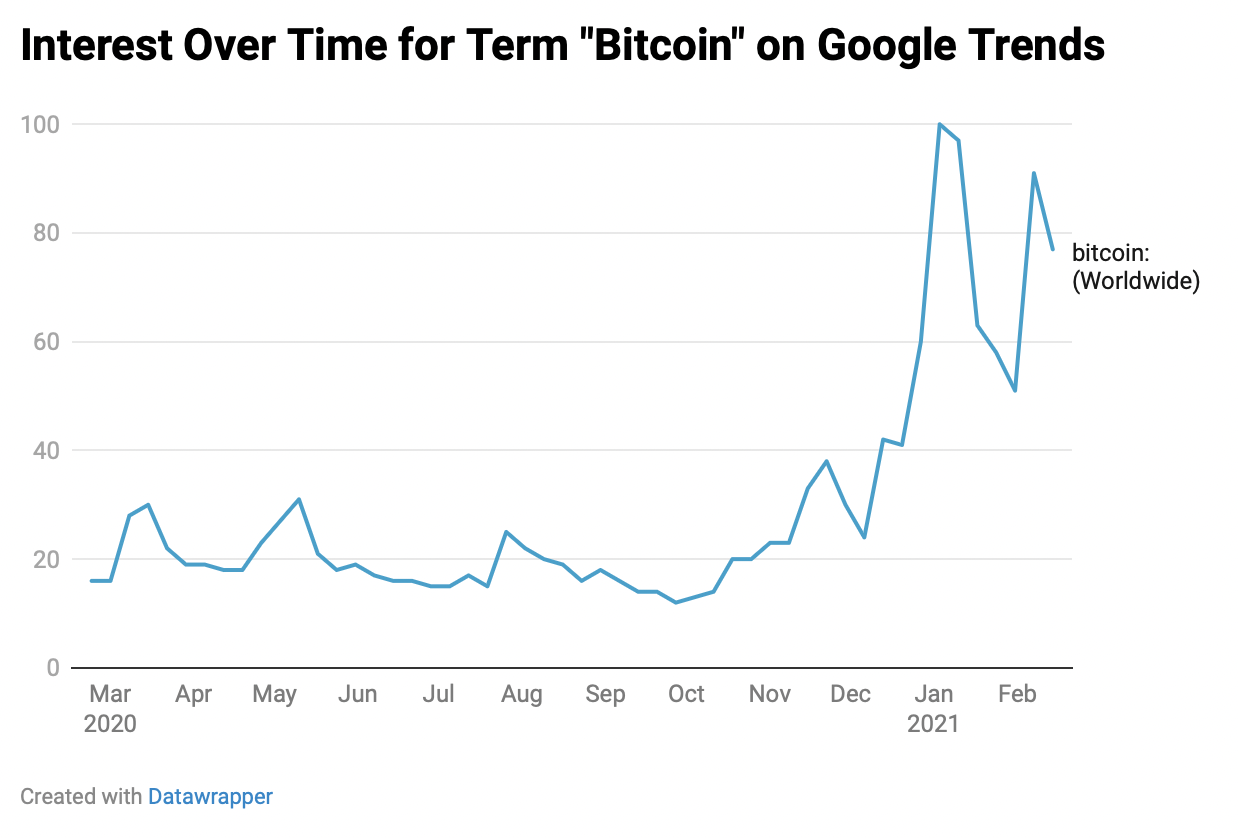
</div>

If you are one of these people and are interested in operating Bitcoin (or other cryptocurrencies), one important graph you should use to perform your analysis is the candlestick, mainly if you are interested in trading (buying and selling to make a profit).

The objective of this project is to show how to easily plot a candlestick chart for Bitcoin price using Python. We will get the historical price data using the Pandas DataReader library and plot the chart using the Plotly library. You can also use the methodology presented here to plot charts for any cryptocurrency, stocks, or ETFs.

**This project is not meant to be a recommendation to buy or to sell Bitcoins.**


## Installing the libraries

In [ ]:
!pip install pandas
!pip install pandas-datareader
!pip install plotly

## Getting Bitcoin historical data using Pandas DataReader

In [2]:
#import libraries
import pandas as pd
import pandas_datareader.data as pdr
import datetime

To get the Bitcoin data from Pandas DataReader, we need to provide the following parameters:
- Start date and end date: period to get the data. In this case, we will use the library datetime and provide the day, month and year. We will get the data for the past 12 months, from February 19th, 2020 to February 18th, 2021.
- Data Source: we will use "yahoo" as our data source.
- Ticker: since we want to plot the Bitcoin price, our ticker is "BTC-USD" (Bitcoin price in US Dollar).

In [3]:
start = datetime.datetime(2020,2,19)
end = datetime.datetime(2021,2,18)
df = pdr.DataReader('BTC-USD','yahoo',start,end)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-19,10191.675781,9611.223633,10143.798828,9633.386719,4.699202e+10,9633.386719
2020-02-20,9643.216797,9507.900391,9629.325195,9608.475586,4.492526e+10,9608.475586
2020-02-21,9723.014648,9589.743164,9611.782227,9686.441406,4.093055e+10,9686.441406
2020-02-22,9698.231445,9600.728516,9687.707031,9663.181641,3.583803e+10,9663.181641
2020-02-23,9937.404297,9657.791016,9663.318359,9924.515625,4.118519e+10,9924.515625


The data frame has the following columns:
- *Date*: the day of reference. Each row represents one day.
- *High*: the highest price of Bitcoin on the reference day.
- *Low*: the lowest price of Bitcoin on the reference day.
- *Open*: the open price of Bitcoin on the reference day.
- *Close*: the closing price of Bitcoin on the reference day.
- *Volume*: the volume of Bitcoin negotiated on the reference day.
- *Adj Close*: the adjusted close price of Bitcoin on the reference day. 

Now that we have the data, let's move to the next part and plot our Candlestick chart.

## Plotting Bitcoin Candlesticks using Plotly

We need to import the *graph_objs* method, which is responsible for creating the graphic itself. Furthermore, since we want to plot our chart in our Notebook, we need to import the *offline* method.

In [5]:
#import libraries
import plotly.offline as py
import plotly.graph_objs as go

In [6]:
#display the plot inside the notebook.
py.init_notebook_mode(connected=True)

To create the chart, we need to use the method *Candlestick* from the *graph_objs* with our  data. It is necessary to provide the data in the x-axis which is our *Date* column, and the data in the y-axis, which is the open, high, low and close prices, which are our *Open*, *High*, *Low* and *Close* columns respectively. We need to put all this information inside a list and assign it in a variable, in the case "data.

Also, we need define the layout, which will allow to customize the plot and insert some features. In this case, we will set a title for our chart and insert a range slider for our date in the x-axis.

Then, it is necessary to create the figure a plot the chart.

In [7]:
data = [go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)]

layout = go.Layout(title='Bitcoin Candlestick with Range Slider',
                   xaxis={'rangeslider':{'visible':True}})

fig = go.Figure(data=data,layout=layout)

py.iplot(fig,filename='bitcoin_candlestick')

## Adding Selectors to the Candlestick Plot

Besides the range slider, we can also add another feature to our plot: the range selector, which provides buttons to select defined ranges in the chart. For this example, it was created some buttons that show the values from the past week (1w), past month (1m), past 3 months (3m), past 6 months (6m) and past year (1y).

To add the selectors, we need to include a new value to our dictionary for the parameter xaxis in the layout.

In [8]:
py.init_notebook_mode(connected=True)

data = [go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)]

layout = go.Layout(title='Bitcoin Candlestick with Range Slider and Selectors',
                  xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1w',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})

fig = go.Figure(data=data,layout=layout)

py.iplot(fig,filename='bitcoin_candlestick_selector')